# Class: Taking Decision and Null Hypothesis

In [1]:
# ==  Basic import == #
# No annoying warnings
import warnings
warnings.filterwarnings('ignore')
# plot within the notebook
%matplotlib inline

*** 
# Reminder


Two types of errors: 

- Type I = "False positive"
- Type II = "False Negative"

We will focus on the idea of taking decision and this will extensively rely on the null hypothesis testing:
"What are the odds that the thing I see is due to the null hypothesis I have"

***
# I – Null Hypothesis


"In Statistics, if you want to show the existence of anything, you have to hypothesize the opposite, i.e., that there is no such effect"

=> To try and show that something is there, you have to try, and fail, to assert the opposite, 

**In Statistics, one cannot meaningfully accept a hypothesis: one can only reject them.**

**Remark**: Showing that you cannot reject the null hypothesis does not mean it is True, it might by that the effect you are looking for is there but your experiment wasn't able to see it. **You can never show there is not effect, the best you can do is setting limits at some confidence level (see next class)**

- Example of the extrasensory perception, what actually are the odds that someone randomly guess X cards over Y trials. 

### Example of the Coin bias
#### two tailed bias (you coin might prefer a side) => null hypothesis: p=1/2
#### one tailed bias (you coin might prefer the Head side) => null hypothesis: p(H)<=1/2


Significance: "a result is **significant** if the probability that if could have arisen from the null hypothesis is small, i.e., below a given confidence level".

## Example Gaussian Distribution

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as mpl

In [3]:
def plot_guassians(loc=1, scale=2):
    """ plot the pdf and the cdf of gaussian and return their axes """
    gaussian_prop = dict(loc=loc, scale=scale)
    x = np.linspace(-10,10,1000)
    fig = mpl.figure(figsize=[12,5])
    ax  = fig.add_subplot(121)
    ax2  = fig.add_subplot(122)
    _ = ax.plot(x, stats.norm.pdf(x, **gaussian_prop), color="k", lw=2, label="PDF N(1,2)")
    _ = ax2.plot(x, stats.norm.cdf(x, **gaussian_prop), color="k", lw=2, label="CDF N(1,2)")
    ax.legend(loc="upper left", frameon=False)
    ax2.legend(loc="upper left", frameon=False)
    return ax,ax2

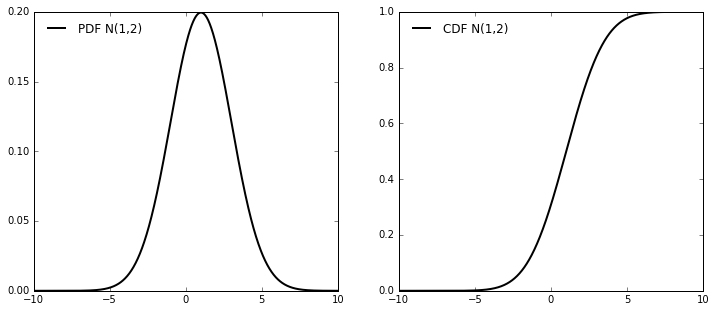

In [4]:
ax,ax2 = plot_guassians()

=> Probability of random drawing a point within given limits [a,b]= CDF[b] - CDF[a]

--------------------------------------------------------------------------------
       chance to randomly draw a point between -10.00 and 5.00 is 97.72%        
--------------------------------------------------------------------------------


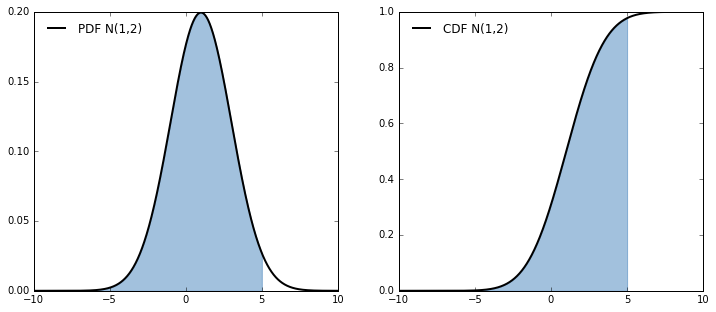

In [26]:
gaussian_prop=dict(loc=1, scale=2)
ax,ax2 = plot_guassians(**gaussian_prop)

# - define
bounds = [-10,5] # i.e. -1 +1sigma
#bounds = [-3,5] # i.e. -2 +2sigma
#bounds = [-10,5] # i.e. 1 tail 2 sigma (for plotting reason I set -10 and not -np.inf, but the latter works with scipy)
# - show it
x = np.linspace(bounds[0],bounds[1], 1e2)
prop_fill = dict(alpha=0.4, color=mpl.cm.Blues(0.8))
ax2.fill_between(x, stats.norm.cdf(x,**gaussian_prop), **prop_fill)
ax.fill_between(x, stats.norm.pdf(x,**gaussian_prop), **prop_fill)
print "".center(80,"-")
print ("chance to randomly draw a point between %.2f and %.2f is %.2f%%"%(
    bounds[0],bounds[1], (stats.norm.cdf(bounds[1], **gaussian_prop) - stats.norm.cdf(bounds[0], **gaussian_prop))*100)
      ).center(80)
print "".center(80,"-")

**Note about error bars**: usually when one plots error bars the +/- 1 sigma error is shown.

## Example Binomial Probability: Medical trial test

See paper sheet

## Example Correlation: Link to p-value


Someone give you 2 arrays of data and You are wonder if they are correlated. For that you null hypothesis will be "they are **not** correlated" and you will consider the null hypothesis rejected if the probability of it to happen is lower than a given $\alpha$ value, say 5%

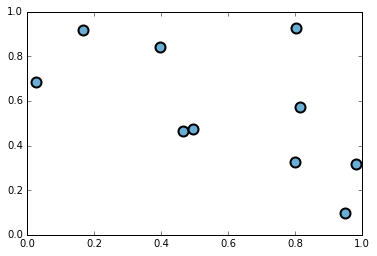

In [33]:
x = np.random.rand(10)
y = np.random.rand(10)
_ = mpl.plot(x,y, ms=10, ls="None", marker="o", mfc= mpl.cm.Blues(0.5), mec= "k", mew=2)

let's measure the correlation coefficient

In [34]:
stats.pearsonr(x,y)

(-0.58460570861696493, 0.075901907223672294)

The documentation says: "Pearson's correlation coefficient, 2-tailed p-value"

**The p-value** is the chance that the observed correlation (here with a coefficient of 0.078) is because of a random fluctuation. Two tails because you considered both negative and positive potential correlation.

We said a correlation would be significative for an $\alpha$ of 5%, so if the p-value $<5$%, here it is not **so we cannot reject the null hypothesis.**

#### And if we create one

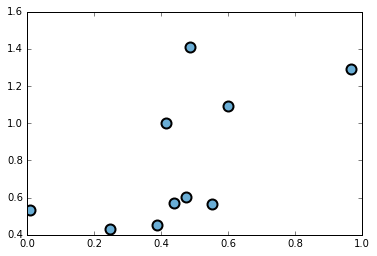

In [44]:
x = np.random.rand(10)
y = np.random.rand(10) + x
_ = mpl.plot(x,y, ms=10, ls="None", marker="o", mfc= mpl.cm.Blues(0.5), mec= "k", mew=2)

In [45]:
stats.pearsonr(x,y)

(0.61805148633786455, 0.056855343258267479)

Maybe Maybe not... because the correlation is weak and you do not have much points... change the number of points, lower the boundaries for detecting a correlation. 


#### A useful Test: the Kolmogorov Smirnov test => could 2 samples be drawn from the same underlying distribution?

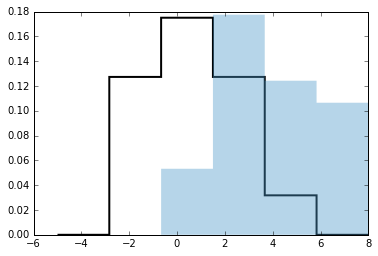

In [51]:
s1 = np.random.normal(loc=1, scale=2, size=30)
s2 = np.random.normal(loc=5, scale=3, size=34)
prop = dict(range=[-5,8], bins=6, histtype="step", normed=True)
_= mpl.hist(s1, fill=False, lw=2, ec="k", **prop)
_= mpl.hist(s2, fill=True, lw=0, facecolor=mpl.cm.Blues(0.6,0.4), **prop)

In [52]:
stats.ks_2samp(s1,s2)

Ks_2sampResult(statistic=0.62745098039215685, pvalue=2.7589583639334706e-06)

### Sigma as confidence level
**Physicists usual talk in terms of "sigma" as a reference of the gaussian distribution**. A 2 sigma detection level typically means that you point liesat the 2sigma position of a gaussian, which means there is less than ~2.5% of  chance that this would be caused by a random fluctuation. 

In the case of the Pearson coef. correlation, this gives the significance (in sigma) of the correlation $\rho$:
$$
 	t = \frac{\rho}{\sqrt{(1 - \rho^2)/(N - 2)} }
$$

In [12]:
rho, p = stats.pearsonr(x,y)
N = 10
print rho/(np.sqrt( (1-rho**2)/(N-2)) )
print "p-value",p

3.57870357951
p-value 0.00720184413552


### Usual confidence level interpretation in Physics:

- 1 sigma: "Nothing"
- 2 sigma: "Interesting, maybe, but most likely nothing, need more data to say"
- **3 sigma**: "hum... you may have something there... let's confirm that with more data"
- 4 sigma: "Haga, there is almost no chance this is a false signal, more data to get the 5sigma and we are good"
- **5 sigma**: "There is something (threshold for discovery)"
    

# II – The Look Elsewhere effect


The problem with statistical fluctuation is that if you try hard enough you will eventually find unlikely cases. If you look at 1000 different experiments you should typically find 3 of them showing a signal at the 3sigma level... 

This is called the **look elsewhere effect**: The actual significance of your measurement have to take into account the number of trial you did to avoid for false-positive signal (Type I error).

The look elsewhere effect is particularly important in particle physics, where you scan potential masses to detect new particle. Each independent scanned mass is a new trial.

To account for the lookelsewhere effect, if you do $m$ observation and you want a result with a $\alpha$ significance, you must consider a 

$$
\alpha/m
$$

significance for a given observation. (_Bonferroni correction, which is a good first order simplification of the more accurate Šidák correction_).

So for instance if you check 10 independent samples to with a 5% significance criteria, you need to have a null hypothesis rejection at the 0.5% significance in an individual sample.

***
## III – Detecting a signal


Measurement of 87 events, while only 54 events were expected because of the background. What are the odds that, while we expected 54, we actually randomly get 87 ? This is Poisson statistics, which could be used in the gaussian approximation (n>10 basically). The width of the gaussian would be $\sqrt{54} = 7.35$. So in the gaussian approximation:

In [13]:
1- stats.norm.cdf(87, loc=54, scale=np.sqrt(54))

3.5489541654332157e-06

Which is really unlikely. We could also see it in terms of sigma: $(87 - 54)/7.35 = 4.5\,\sigma$

However, if you scanned 100 masses  and find this excess, this would be equivalent to p-value ~of 3.5e-4 closer to a "global" $3.4\,\sigma$ level detection

In [16]:
(stats.norm.ppf(1-3.5e-4, loc=54, scale=np.sqrt(54)) - 54)/ np.sqrt(54)

3.3895791411330212

***
## IV – Goodness of Fit

Is the fit you perform "good" ? => Do you have unexpectingly hight dispersion around you fit? to know, one of the most powerful tools is to do a $\chi^2$ test.

$$
\chi^2 = \sum_{1=1}^{N} \frac{[y_i - f(x_i)]^2}{\sigma_i^2}
$$
where $f$ is the model function and $\sigma_i$ the error of $y_i$. (assuming here uncorrelated errors, see covariance matrix definition of the $\chi^2$ otherwise).

The probability distribution for the $\chi^2$ is given by:

$$
P(\chi^2, N) = \frac{2^{-N/2}}{\Gamma(N/2)} \chi^{N-2} e^{-\chi^2/2}
$$



0.987597939281


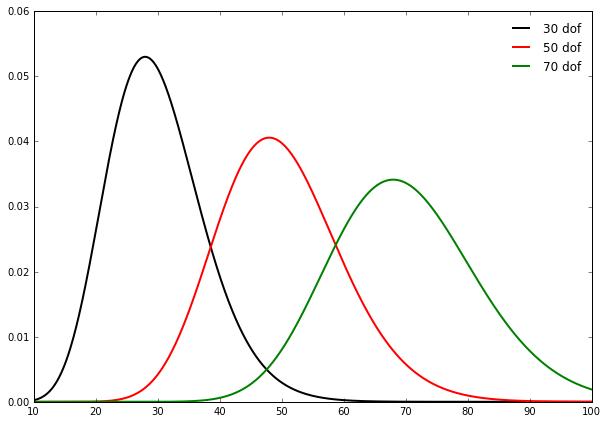

In [53]:

x = np.linspace(10,100,1000)
fig = mpl.figure(figsize=[10,7])
ax  = fig.add_subplot(111)
ax.plot(x,stats.chi2.pdf(x, 30),"k-",lw=2, label=r"30 dof")
ax.plot(x,stats.chi2.pdf(x, 50),"r-",lw=2, label=r"50 dof")
ax.plot(x,stats.chi2.pdf(x, 70),"g-",lw=2, label=r"70 dof")
ax.legend(loc="upper right", frameon=False)
print stats.chi2.cdf(50, 30)


### AIC : Penalizing extra degrees of freedom

The Akaike Information Criterium is a method to accurately penalize model having extra degrees of freedom.

$$
AIC = 2k - 2\ln \mathcal{L}
$$

where $\mathcal{L}$ is the likelihood of the fit ($-2\ln\mathcal{L} \propto \chi^2$) and $k$ is the degree of freeparameters in the model.

**Which is the best model?** the preferred model is the one with the minimum AIC value. 

To correct for a finite sample size (say $n$), you should you the corrected AIC (AICc):

$$
AICc = AIC + \frac{2k(k+1)}{n-k-1}
$$

The likelihood of a model to be acceptable with a $AICc_i$ in comparison to the best model having $AICc=AICc_{min}$ is

$$
l_{model} = exp (\frac{AICc_{min} - AICc_i}{2})
$$

usually a model with a $\Delta AICc = AICc_{i} - AICc_{min}$ of more than 10 can be ruled out in comparison to the best one

In [101]:
np.exp(-10/2.)

0.006737946999085467

***
# V – A good reflex of Datas Scientist Blind analysis

***
# Illustration: The 750Gev Excess

In [116]:
import matplotlib.image as mpimg
atlas_excess =  mpimg.imread("/Users/mrigault/Desktop/useful_plots/NonSNeIaData/Atlas_750Excess.png")
cms_excess =  mpimg.imread("/Users/mrigault/Desktop/useful_plots/NonSNeIaData/CMS_750Excess.png")

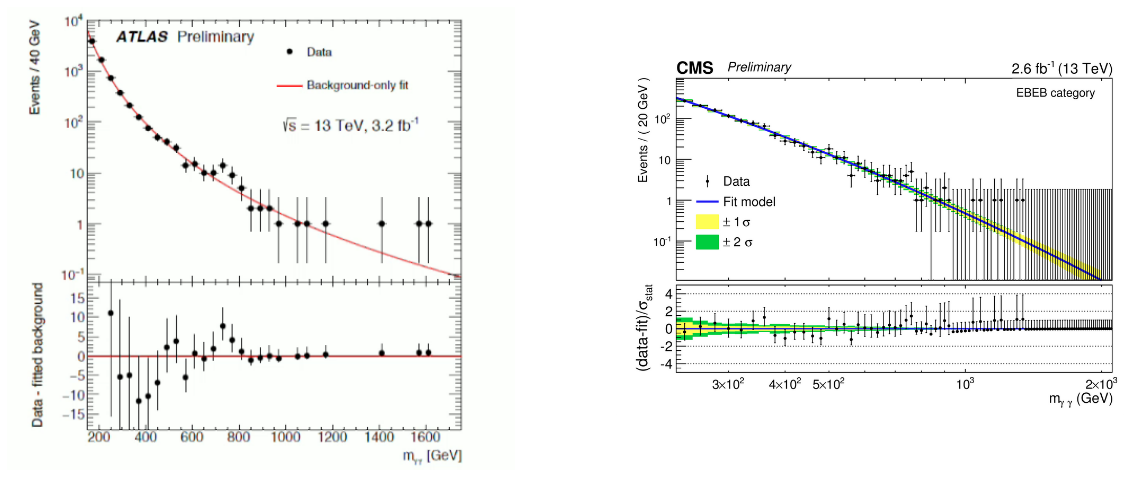

In [123]:
fig = mpl.figure(figsize=[20,10])
axatlas = fig.add_subplot(121, frameon=False)
axcms = fig.add_subplot(122, frameon=False)
_ = axatlas.imshow(atlas_excess)
_ = axcms.imshow(cms_excess)
_ = [ax.set_xticks([]) for ax in [axatlas,axcms]]
_ = [ax.set_yticks([]) for ax in [axatlas,axcms]]

Significance of the Excess (as of June 2016):

- Atlas: $3.9\,\sigma$ locally, $2\,\sigma$ 
- CMS: $3.4\,\sigma$ locally, $1.6\,\sigma$ 

(some speakers say down to $\approx1\,\sigma$ considering all the channel looked at.)


So stay tuned, we should know if the excess goes away by Decembre.